In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('result.csv')
dataset

,Name_Evr,Name_Fun,Time,Epoch,Best_Fit,Std,Optimum,Parameters
0,IWO,easom_function,0.052080,10,-0.999998,0.000002,-1.000000,NO
1,IWO,ackley_function,0.034397,10,0.004035,0.004035,0.000000,NO
2,IWO,ackley_function_3,0.032113,10,-184.742680,10.886348,-195.629028,NO
3,IWO,keane_function,0.033521,10,-0.287661,0.386007,-0.673668,NO
4,IWO,michaelwicz_function,0.030911,10,-1.801282,0.000018,-1.801300,NO
...,...,...,...,...,...,...,...,...
87995,PSO,composite_xin_she_yang_4_schwefel_function,1.832515,1000,249.139915,0.000767,249.139148,NO
87996,PSO,composite_cross_in_tray_drop_wave_function,1.653749,1000,-1.266689,0.002023,-1.268712,NO
87997,PSO,composite_schaffer_drop_wave_function,1.580309,1000,-0.787934,0.012066,-0.800000,NO
87998,PSO,composite_shubert_function,1.993380,1000,-92.486101,0.060792,-92.546893,NO


In [3]:
dataset.groupby(['Name_Evr']).count()

,Name_Fun,Time,Epoch,Best_Fit,Std,Optimum,Parameters
Name_Evr,,,,,,,
ABC,8000,8000,8000,8000,8000,8000,8000
ACO,8000,8000,8000,8000,8000,8000,8000
BBO,8000,8000,8000,8000,8000,8000,8000
CA,8000,8000,8000,8000,8000,8000,8000
DE,8000,8000,8000,8000,8000,8000,8000
FBIO,8000,8000,8000,8000,8000,8000,8000
GA,8000,8000,8000,8000,8000,8000,8000
GBO,8000,8000,8000,8000,8000,8000,8000
HHO,8000,8000,8000,8000,8000,8000,8000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88000 entries, 0 to 87999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name_Evr    88000 non-null  object 
 1   Name_Fun    88000 non-null  object 
 2   Time        88000 non-null  float64
 3   Epoch       88000 non-null  int64  
 4   Best_Fit    88000 non-null  float64
 5   Std         88000 non-null  float64
 6   Optimum     88000 non-null  float64
 7   Parameters  88000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 5.4+ MB


In [5]:
print('Heuristics:', pd.unique(dataset['Name_Evr']), '\n')
print('Functions:', pd.unique(dataset['Name_Fun']))

Heuristics: ['IWO' 'HHO' 'ABC' 'BBO' 'CA' 'GA' 'ACO' 'DE' 'FBIO' 'GBO' 'PSO'] 

Functions: ['easom_function' 'ackley_function' 'ackley_function_3' 'keane_function'
 'michaelwicz_function' 'rosenbrook_function'
 'nonsmooth_multipeak_function' 'brown_function' 'levin_function_13'
 'bird_function' 'schwefel_function' 'brent_function'
 'deckkers_aarts_function' 'xin_she_yang_function_4' 'eggholder_function'
 'shubert_function' 'schaffer_function' 'shubert_function_4'
 'drop_wave_function' 'cross_in_tray_function'
 'composite_xin_she_yang_4_schwefel_function'
 'composite_cross_in_tray_drop_wave_function'
 'composite_schaffer_drop_wave_function' 'composite_shubert_function'
 'composite_shubert_4_levin_function_13']


In [7]:
IWO = dataset[(dataset['Name_Evr'] == 'IWO')]
HHO = dataset[(dataset['Name_Evr'] == 'HHO')]
ABC = dataset[(dataset['Name_Evr'] == 'ABC')]
ACO = dataset[(dataset['Name_Evr'] == 'ACO')]
BBO = dataset[(dataset['Name_Evr'] == 'BBO')]
CA = dataset[(dataset['Name_Evr'] == 'CA')]
GA = dataset[(dataset['Name_Evr'] == 'GA')]

In [8]:
IWO_TE = IWO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ACO_TE = ACO[['Time', 'Epoch']].groupby(['Epoch']).mean()
HHO_TE = HHO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ABC_TE = ABC[['Time', 'Epoch']].groupby(['Epoch']).mean()
BBO_TE = BBO[['Time', 'Epoch']].groupby(['Epoch']).mean()
CA_TE = CA[['Time', 'Epoch']].groupby(['Epoch']).mean()
GA_TE = GA[['Time', 'Epoch']].groupby(['Epoch']).mean()

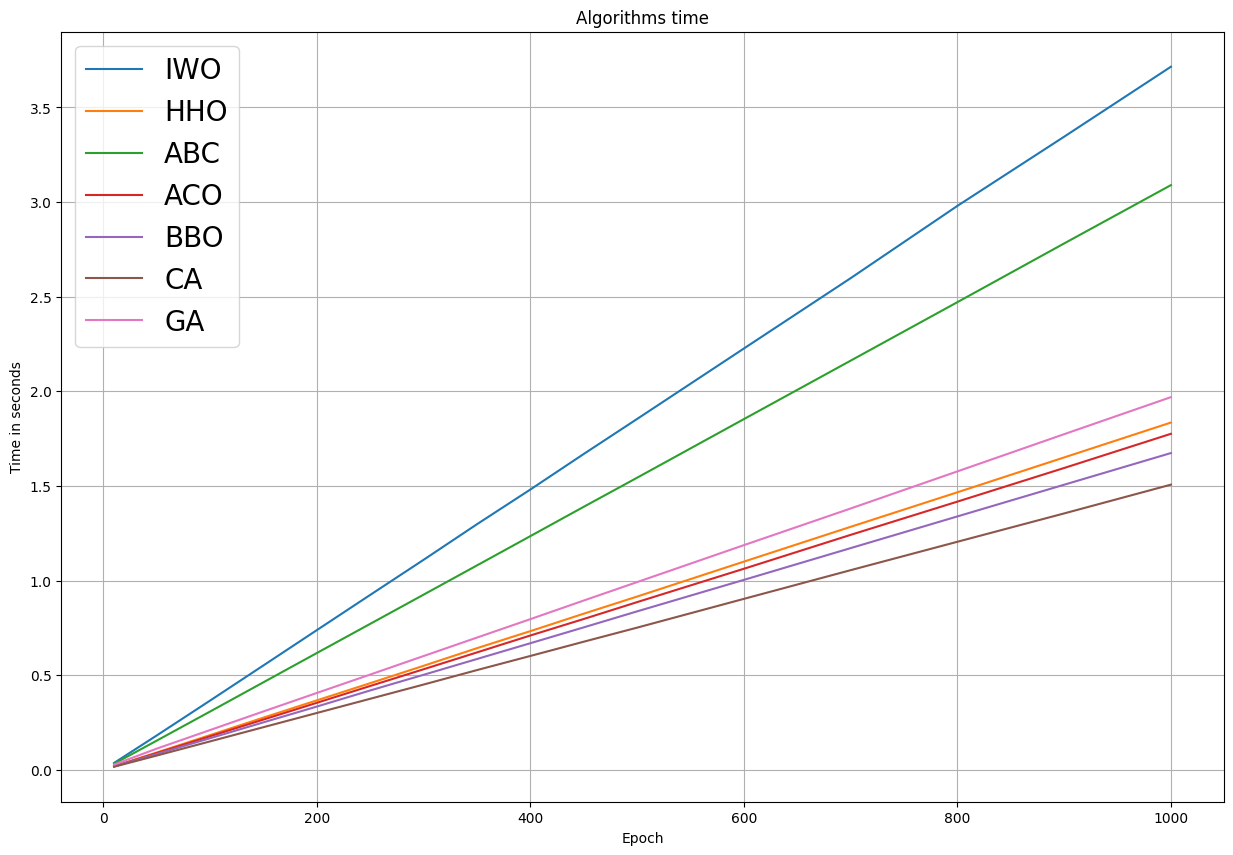

In [9]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_TE['Time'], label = 'IWO')
plt.plot(HHO_TE['Time'], label = 'HHO')
plt.plot(ABC_TE['Time'], label = 'ABC')
plt.plot(ACO_TE['Time'], label = 'ACO')
plt.plot(BBO_TE['Time'], label = 'BBO')
plt.plot(CA_TE['Time'], label = 'CA')
plt.plot(GA_TE['Time'], label = 'GA')

plt.ylabel('Time in seconds')
plt.xlabel('Epoch')
plt.title('Algorithms time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [10]:
IWO_ES = IWO[['Epoch', 'Std']].groupby(['Epoch']).mean()
HHO_ES = HHO[['Epoch', 'Std']].groupby(['Epoch']).mean()
ABC_ES = ABC[['Epoch', 'Std']].groupby(['Epoch']).mean()
ACO_ES = ACO[['Epoch', 'Std']].groupby(['Epoch']).mean()
BBO_ES = BBO[['Epoch', 'Std']].groupby(['Epoch']).mean()
CA_ES = CA[['Epoch', 'Std']].groupby(['Epoch']).mean()
GA_ES = GA[['Epoch', 'Std']].groupby(['Epoch']).mean()

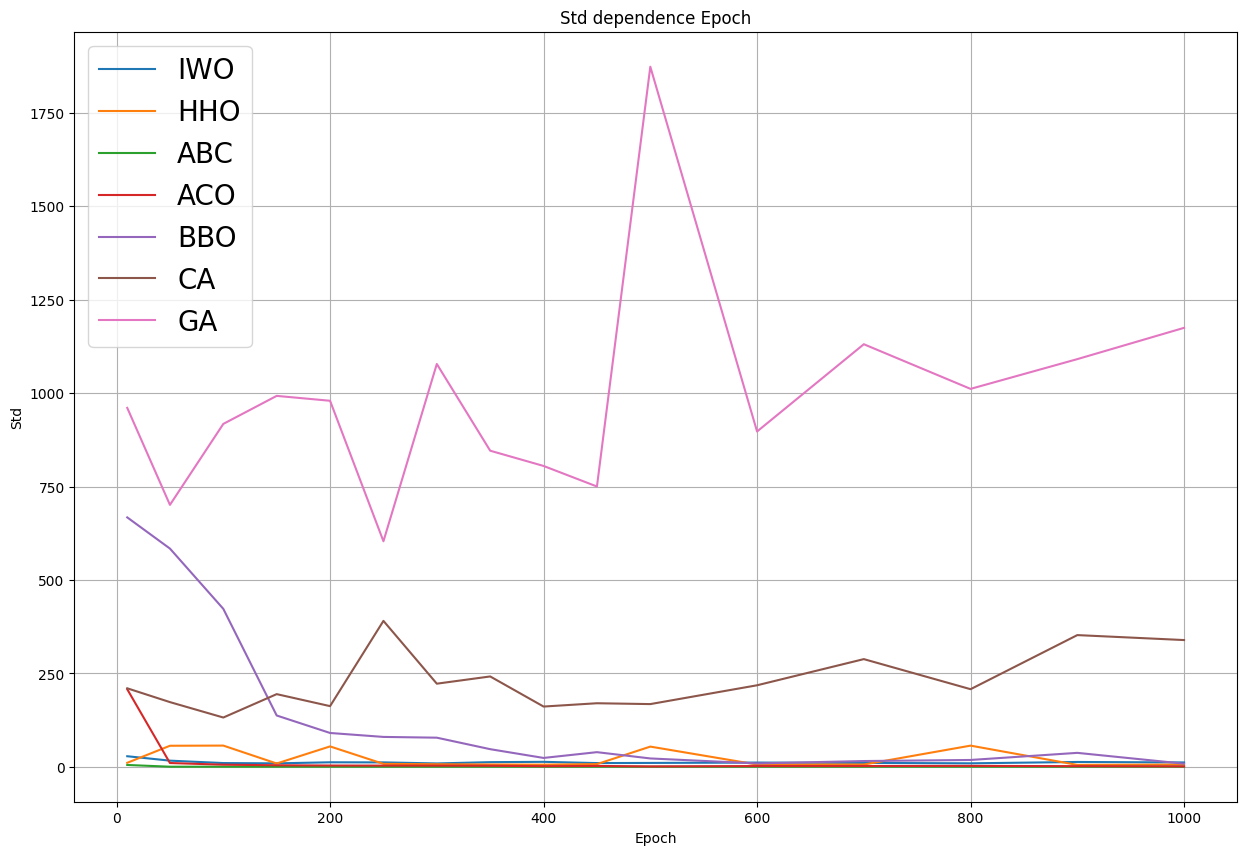

In [11]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_ES['Std'], label = 'IWO')
plt.plot(HHO_ES['Std'], label = 'HHO')
plt.plot(ABC_ES['Std'], label = 'ABC')
plt.plot(ACO_ES['Std'], label = 'ACO')
plt.plot(BBO_ES['Std'], label = 'BBO')
plt.plot(CA_ES['Std'], label = 'CA')
plt.plot(GA_ES['Std'], label = 'GA')

plt.ylabel('Std')
plt.xlabel('Epoch')
plt.title('Std dependence Epoch')
plt.legend(loc=2, prop={'size': 20})
plt.show()

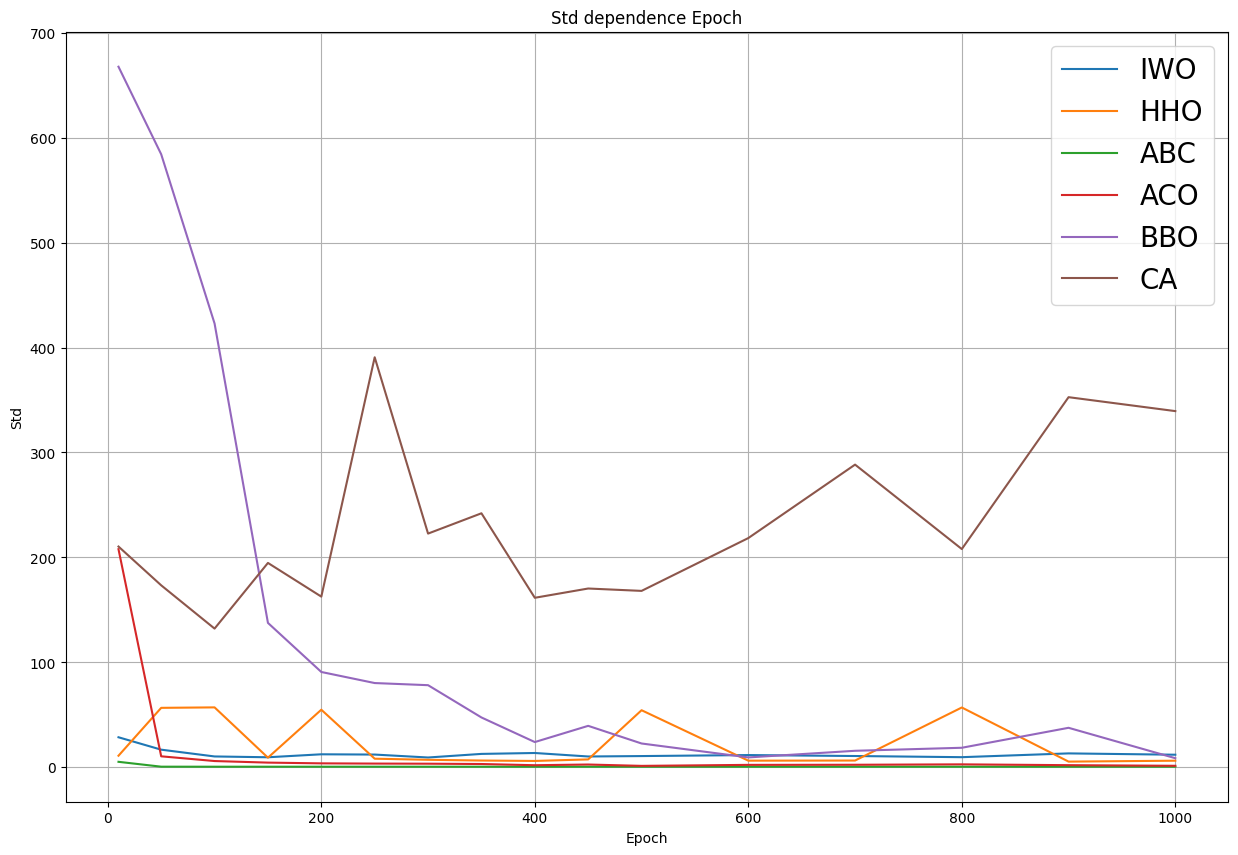

In [12]:
# No GA
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_ES['Std'], label = 'IWO')
plt.plot(HHO_ES['Std'], label = 'HHO')
plt.plot(ABC_ES['Std'], label = 'ABC')
plt.plot(ACO_ES['Std'], label = 'ACO')
plt.plot(BBO_ES['Std'], label = 'BBO')
plt.plot(CA_ES['Std'], label = 'CA')

plt.ylabel('Std')
plt.xlabel('Epoch')
plt.title('Std dependence Epoch')
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [13]:
dataset[dataset['Epoch'] == 200][['Name_Evr', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr']).mean()

,Time,Best_Fit,Std,Optimum
Name_Evr,,,,
ABC,0.617925,-1044.358076,0.587494,-1044.509675
ACO,0.354803,-1041.099644,3.792716,-1044.509675
BBO,0.334981,-953.666813,90.862354,-1044.509675
CA,0.301065,-881.864277,162.667186,-1044.509675
DE,0.300205,-1044.039959,0.905613,-1044.509675
FBIO,0.930527,-1044.346845,0.598728,-1044.509675
GA,0.406846,-64.924652,979.585067,-1044.509675
GBO,0.716531,-1044.106593,0.838924,-1044.509675
HHO,0.367731,-990.009994,54.913872,-1044.509675


# Evr

In [14]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ACO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
ACO      ackley_function                             0.351374  5.169376e-12   
         ackley_function_3                           0.351531 -1.864108e+02   
         bird_function                               0.351206 -1.066948e+02   
         brent_function                              0.344589  1.442615e-25   
         brown_function                              0.342540  2.689906e-04   
         composite_cross_in_tray_drop_wave_function  0.358259 -1.268390e+00   
         composite_schaffer_drop_wave_function       0.350261 -7.968982e-01   
         composite_shubert_4_levin_function_13       0.381545 -1.269162e+01   
         composite_shubert_function                  0.391479 -9.079223e+01   
         composite_xin_she_yang_4_schwefel_function  0.374135  2.491391e+02   
         cross_in_tray_function                      0.353714 -2.062605e+00   
         deckkers_aarts_function                     0.343546 -2.477571e+04   
         drop_wave_function                          0.346618 -9.961451e-01   
         easom_function                              0.347622 -1.000000e+00   
         eggholder_function                          0.352353 -9.545115e+02   
         keane_function                              0.348106 -6.734813e-01   
         levin_function_13                           0.353914  4.138872e-23   
         michaelwicz_function                        0.348650 -1.801303e+00   
         nonsmooth_multipeak_function                0.342996  0.000000e+00   
         rosenbrook_function                         0.341719  8.390751e-05   
         schaffer_function                           0.345598  0.000000e+00   
         schwefel_function                           0.349080  6.853812e+01   
         shubert_function                            0.366548 -1.830133e+02   
         shubert_function_4                          0.365555 -2.474535e+01   
         xin_she_yang_function_4                     0.367130 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
ACO      ackley_function                             5.169376e-12   
         ackley_function_3                           9.218194e+00   
         bird_function                               1.114887e-01   
         brent_function                              1.442615e-25   
         brown_function                              2.689906e-04   
         composite_cross_in_tray_drop_wave_function  3.222998e-04   
         composite_schaffer_drop_wave_function       3.101766e-03   
         composite_shubert_4_levin_function_13       4.364442e-01   
         composite_shubert_function                  1.754668e+00   
         composite_xin_she_yang_4_schwefel_function  0.000000e+00   
         cross_in_tray_function                      7.358697e-06   
         deckkers_aarts_function                     4.908834e+00   
         drop_wave_function                          3.854928e-03   
         easom_function                              1.495470e-14   
         eggholder_function                          5.129213e+00   
         keane_function                              1.861972e-04   
         levin_function_13                           4.138872e-23   
         michaelwicz_function                        3.410099e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         8.390751e-05   
         schaffer_function                           0.000000e+00   
         schwefel_function                           6.853812e+01   
         shubert_function                            3.717608e+00   
         shubert_function_4                          9.955110e-01   
         xin_she_yang_function_4                     4.606396e-08   

                                                          O

In [15]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'IWO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
IWO      ackley_function                             0.684552  3.560026e-04   
         ackley_function_3                           0.677144 -1.864112e+02   
         bird_function                               0.681329 -1.067877e+02   
         brent_function                              0.638010  2.244190e-08   
         brown_function                              0.630693  1.151903e-03   
         composite_cross_in_tray_drop_wave_function  0.790277 -1.268690e+00   
         composite_schaffer_drop_wave_function       0.717875 -7.987827e-01   
         composite_shubert_4_levin_function_13       1.016167 -1.312181e+01   
         composite_shubert_function                  1.161927 -9.254686e+01   
         composite_xin_she_yang_4_schwefel_function  0.958782  2.491391e+02   
         cross_in_tray_function                      0.727831 -2.062612e+00   
         deckkers_aarts_function                     0.622941 -2.477652e+04   
         drop_wave_function                          0.681406 -9.989392e-01   
         easom_function                              0.630453 -9.500000e-01   
         eggholder_function                          0.711225 -7.942655e+02   
         keane_function                              0.674598 -6.736675e-01   
         levin_function_13                           0.734326  2.216360e-07   
         michaelwicz_function                        0.652135 -1.801303e+00   
         nonsmooth_multipeak_function                0.629084  0.000000e+00   
         rosenbrook_function                         0.598311  2.265272e-07   
         schaffer_function                           0.659976  8.838666e-05   
         schwefel_function                           0.649323  1.302918e+02   
         shubert_function                            0.858464 -1.867309e+02   
         shubert_function_4                          0.852719 -2.574177e+01   
         xin_she_yang_function_4                     0.833759 -1.699896e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
IWO      ackley_function                             3.560026e-04   
         ackley_function_3                           9.217824e+00   
         bird_function                               2.319485e-02   
         brent_function                              2.244190e-08   
         brown_function                              1.151903e-03   
         composite_cross_in_tray_drop_wave_function  2.194807e-05   
         composite_schaffer_drop_wave_function       1.217337e-03   
         composite_shubert_4_levin_function_13       6.257381e-03   
         composite_shubert_function                  3.068631e-05   
         composite_xin_she_yang_4_schwefel_function  9.452586e-09   
         cross_in_tray_function                      1.869369e-06   
         deckkers_aarts_function                     5.424338e+00   
         drop_wave_function                          1.060809e-03   
         easom_function                              5.000003e-02   
         eggholder_function                          1.653752e+02   
         keane_function                              3.480565e-08   
         levin_function_13                           2.216360e-07   
         michaelwicz_function                        3.054506e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         2.265272e-07   
         schaffer_function                           8.838666e-05   
         schwefel_function                           1.302918e+02   
         shubert_function                            2.160217e-05   
         shubert_function_4                          9.095216e-04   
         xin_she_yang_function_4                     3.001041e-01   

                                                          O

In [16]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'HHO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
HHO      ackley_function                             0.354216  0.000000e+00   
         ackley_function_3                           0.357485 -1.864112e+02   
         bird_function                               0.350554 -1.067877e+02   
         brent_function                              0.332209  2.374757e-19   
         brown_function                              0.317663  3.617615e-76   
         composite_cross_in_tray_drop_wave_function  0.380572 -1.268712e+00   
         composite_schaffer_drop_wave_function       0.349847 -8.000000e-01   
         composite_shubert_4_levin_function_13       0.462131 -1.238847e+01   
         composite_shubert_function                  0.502795 -9.254689e+01   
         composite_xin_she_yang_4_schwefel_function  0.438533  2.491940e+02   
         cross_in_tray_function                      0.363055 -2.062612e+00   
         deckkers_aarts_function                     0.332219 -2.353769e+04   
         drop_wave_function                          0.338973 -1.000000e+00   
         easom_function                              0.343082 -1.000000e+00   
         eggholder_function                          0.361303 -8.933643e+02   
         keane_function                              0.345769 -6.736675e-01   
         levin_function_13                           0.364077  3.331499e-04   
         michaelwicz_function                        0.345308 -1.721173e+00   
         nonsmooth_multipeak_function                0.327801  0.000000e+00   
         rosenbrook_function                         0.323147  1.381837e-25   
         schaffer_function                           0.333374  0.000000e+00   
         schwefel_function                           0.346080  5.231043e+01   
         shubert_function                            0.410893 -1.867309e+02   
         shubert_function_4                          0.408619 -2.530646e+01   
         xin_she_yang_function_4                     0.403564 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
HHO      ackley_function                             0.000000e+00   
         ackley_function_3                           9.217816e+00   
         bird_function                               2.319669e-02   
         brent_function                              2.374757e-19   
         brown_function                              3.617615e-76   
         composite_cross_in_tray_drop_wave_function  5.660918e-08   
         composite_schaffer_drop_wave_function       0.000000e+00   
         composite_shubert_4_levin_function_13       7.395971e-01   
         composite_shubert_function                  3.311314e-10   
         composite_xin_she_yang_4_schwefel_function  5.481690e-02   
         cross_in_tray_function                      1.870823e-06   
         deckkers_aarts_function                     1.243708e+03   
         drop_wave_function                          0.000000e+00   
         easom_function                              6.661338e-17   
         eggholder_function                          6.627639e+01   
         keane_function                              2.053913e-16   
         levin_function_13                           3.331499e-04   
         michaelwicz_function                        8.013307e-02   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         1.381837e-25   
         schaffer_function                           0.000000e+00   
         schwefel_function                           5.231043e+01   
         shubert_function                            8.830188e-06   
         shubert_function_4                          4.360289e-01   
         xin_she_yang_function_4                     0.000000e+00   

                                                          O

In [17]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ABC')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
ABC      ackley_function                             0.603764  0.000000e+00   
         ackley_function_3                           0.605575 -1.864112e+02   
         bird_function                               0.597275 -1.067877e+02   
         brent_function                              0.578288  1.383897e-87   
         brown_function                              0.571284  1.634161e-21   
         composite_cross_in_tray_drop_wave_function  0.630731 -1.268711e+00   
         composite_schaffer_drop_wave_function       0.600716 -7.999999e-01   
         composite_shubert_4_levin_function_13       0.718861 -1.312807e+01   
         composite_shubert_function                  0.765919 -9.253702e+01   
         composite_xin_she_yang_4_schwefel_function  0.694509  2.491391e+02   
         cross_in_tray_function                      0.611068 -2.062612e+00   
         deckkers_aarts_function                     0.574680 -2.477652e+04   
         drop_wave_function                          0.587879 -9.999996e-01   
         easom_function                              0.593128 -9.998443e-01   
         eggholder_function                          0.609327 -9.596407e+02   
         keane_function                              0.592744 -6.736675e-01   
         levin_function_13                           0.613126  1.349784e-31   
         michaelwicz_function                        0.591860 -1.801303e+00   
         nonsmooth_multipeak_function                0.577982  0.000000e+00   
         rosenbrook_function                         0.566155  1.362727e-30   
         schaffer_function                           0.582349  0.000000e+00   
         schwefel_function                           0.591135  2.545513e-05   
         shubert_function                            0.666117 -1.867201e+02   
         shubert_function_4                          0.662222 -2.574175e+01   
         xin_she_yang_function_4                     0.661426 -2.000000e+00   

                                                              Std  \
Name_Evr Name_Fun                                                   
ABC      ackley_function                             0.000000e+00   
         ackley_function_3                           9.217816e+00   
         bird_function                               2.319669e-02   
         brent_function                              1.383897e-87   
         brown_function                              1.634161e-21   
         composite_cross_in_tray_drop_wave_function  8.686066e-07   
         composite_schaffer_drop_wave_function       1.020684e-07   
         composite_shubert_4_levin_function_13       1.243450e-15   
         composite_shubert_function                  9.873416e-03   
         composite_xin_she_yang_4_schwefel_function  0.000000e+00   
         cross_in_tray_function                      1.870823e-06   
         deckkers_aarts_function                     5.424592e+00   
         drop_wave_function                          3.783280e-07   
         easom_function                              1.556606e-04   
         eggholder_function                          3.727915e-05   
         keane_function                              1.276756e-16   
         levin_function_13                           1.349784e-31   
         michaelwicz_function                        3.410099e-06   
         nonsmooth_multipeak_function                0.000000e+00   
         rosenbrook_function                         1.362727e-30   
         schaffer_function                           0.000000e+00   
         schwefel_function                           2.545513e-05   
         shubert_function                            1.076197e-02   
         shubert_function_4                          8.892179e-04   
         xin_she_yang_function_4                     0.000000e+00   

                                                          O

In [18]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'BBO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
BBO      ackley_function                             0.325305      2.588795   
         ackley_function_3                           0.329487   -174.001668   
         bird_function                               0.321794   -105.968402   
         brent_function                              0.315602      0.019124   
         brown_function                              0.312119      0.004587   
         composite_cross_in_tray_drop_wave_function  0.337879     -1.251670   
         composite_schaffer_drop_wave_function       0.322690     -0.733164   
         composite_shubert_4_levin_function_13       0.387841    -11.258384   
         composite_shubert_function                  0.409013    -89.070968   
         composite_xin_she_yang_4_schwefel_function  0.374367    249.149430   
         cross_in_tray_function                      0.333412     -2.062086   
         deckkers_aarts_function                     0.315183 -22621.530813   
         drop_wave_function                          0.320145     -0.918894   
         easom_function                              0.321760     -0.075656   
         eggholder_function                          0.332024   -880.586069   
         keane_function                              0.324203     -0.652785   
         levin_function_13                           0.334201      0.152444   
         michaelwicz_function                        0.321156     -1.788866   
         nonsmooth_multipeak_function                0.314127      0.043384   
         rosenbrook_function                         0.309710      0.332418   
         schaffer_function                           0.319430      0.003647   
         schwefel_function                           0.319163      5.287159   
         shubert_function                            0.357957   -182.728961   
         shubert_function_4                          0.358011    -25.309128   
         xin_she_yang_function_4                     0.357952     -1.313809   

                                                             Std       Optimum  
Name_Evr Name_Fun                                                               
BBO      ackley_function                                2.588795      0.000000  
         ackley_function_3                             21.627360   -195.629028  
         bird_function                                  0.796135   -106.764537  
         brent_function                                 0.019124      0.000000  
         brown_function                                 0.004587      0.000000  
         composite_cross_in_tray_drop_wave_function     0.017042     -1.268712  
         composite_schaffer_drop_wave_function          0.066836     -0.800000  
         composite_shubert_4_levin_function_13          1.869682    -13.128066  
         composite_shubert_function                     3.475925    -92.546893  
         composite_xin_she_yang_4_schwefel_function     0.010282    249.139148  
         cross_in_tray_function                         0.000524     -2.062610  
         deckkers_aarts_function                     2150.050180 -24771.093750  
         drop_wave_function                             0.081106     -1.000000  
         easom_function                                 0.924344     -1.000000  
         eggholder_function                            79.054631   -959.640700  
         keane_function                                 0.020882     -0.673668  
         levin_function_13                              0.152444      0.000000  
         michaelwicz_function                           0.012434     -1.801300  
         nonsmooth_multipeak_function                   0.043384      0.000000  
         rosenbrook_function                            0.332418      0.000000  
         schaffer_function                              0.003647      0.000000  
         schwefel_function                              5.28

In [19]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'CA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit  \
Name_Evr Name_Fun                                                             
CA       ackley_function                             0.300913      2.221036   
         ackley_function_3                           0.294955   -171.958916   
         bird_function                               0.297842   -100.630212   
         brent_function                              0.279652      0.126204   
         brown_function                              0.276249      0.007542   
         composite_cross_in_tray_drop_wave_function  0.312685     -1.263666   
         composite_schaffer_drop_wave_function       0.298062     -0.755901   
         composite_shubert_4_levin_function_13       0.351175     -8.952337   
         composite_shubert_function                  0.371995    -84.947270   
         composite_xin_she_yang_4_schwefel_function  0.337761    249.177363   
         cross_in_tray_function                      0.298308     -2.060607   
         deckkers_aarts_function                     0.278396 -21053.615819   
         drop_wave_function                          0.283953     -0.904370   
         easom_function                              0.285445     -0.383559   
         eggholder_function                          0.297640   -799.763824   
         keane_function                              0.288393     -0.627433   
         levin_function_13                           0.297908      0.326030   
         michaelwicz_function                        0.290232     -1.730767   
         nonsmooth_multipeak_function                0.277613      0.240457   
         rosenbrook_function                         0.275274      0.071838   
         schaffer_function                           0.280992      0.001724   
         schwefel_function                           0.287902    119.268846   
         shubert_function                            0.322132   -166.771873   
         shubert_function_4                          0.320963    -22.393218   
         xin_she_yang_function_4                     0.320181     -1.288197   

                                                             Std       Optimum  
Name_Evr Name_Fun                                                               
CA       ackley_function                                2.221036      0.000000  
         ackley_function_3                             23.670112   -195.629028  
         bird_function                                  6.138550   -106.764537  
         brent_function                                 0.126204      0.000000  
         brown_function                                 0.007542      0.000000  
         composite_cross_in_tray_drop_wave_function     0.005046     -1.268712  
         composite_schaffer_drop_wave_function          0.044099     -0.800000  
         composite_shubert_4_levin_function_13          4.175730    -13.128066  
         composite_shubert_function                     7.599623    -92.546893  
         composite_xin_she_yang_4_schwefel_function     0.038216    249.139148  
         cross_in_tray_function                         0.002004     -2.062610  
         deckkers_aarts_function                     3718.018418 -24771.093750  
         drop_wave_function                             0.095630     -1.000000  
         easom_function                                 0.616441     -1.000000  
         eggholder_function                           159.876876   -959.640700  
         keane_function                                 0.046235     -0.673668  
         levin_function_13                              0.326030      0.000000  
         michaelwicz_function                           0.070535     -1.801300  
         nonsmooth_multipeak_function                   0.240457      0.000000  
         rosenbrook_function                            0.071838      0.000000  
         schaffer_function                              0.001724      0.000000  
         schwefel_function                            119.26

In [20]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'GA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time    Best_Fit  \
Name_Evr Name_Fun                                                           
GA       ackley_function                             0.391066    4.205556   
         ackley_function_3                           0.398686 -148.661824   
         bird_function                               0.398345 -101.893330   
         brent_function                              0.383293    0.119278   
         brown_function                              0.384771    0.013394   
         composite_cross_in_tray_drop_wave_function  0.412696   -1.227782   
         composite_schaffer_drop_wave_function       0.399100   -0.709639   
         composite_shubert_4_levin_function_13       0.451039   -8.119130   
         composite_shubert_function                  0.480854  -65.897369   
         composite_xin_she_yang_4_schwefel_function  0.439207  249.203315   
         cross_in_tray_function                      0.397530   -2.059260   
         deckkers_aarts_function                     0.385640 -608.950236   
         drop_wave_function                          0.390088   -0.779271   
         easom_function                              0.379444   -0.023138   
         eggholder_function                          0.462464 -811.202532   
         keane_function                              0.400582   -0.548346   
         levin_function_13                           0.401461    0.718742   
         michaelwicz_function                        0.390414   -1.600882   
         nonsmooth_multipeak_function                0.379850    0.086071   
         rosenbrook_function                         0.383205    1.387963   
         schaffer_function                           0.394893    0.004833   
         schwefel_function                           0.388881   25.457845   
         shubert_function                            0.437194 -126.811551   
         shubert_function_4                          0.421731  -24.398646   
         xin_she_yang_function_4                     0.418718   -1.430358   

                                                              Std  \
Name_Evr Name_Fun                                                   
GA       ackley_function                                 4.205556   
         ackley_function_3                              46.967205   
         bird_function                                   4.872202   
         brent_function                                  0.119278   
         brown_function                                  0.013394   
         composite_cross_in_tray_drop_wave_function      0.040931   
         composite_schaffer_drop_wave_function           0.090361   
         composite_shubert_4_levin_function_13           5.008936   
         composite_shubert_function                     26.649525   
         composite_xin_she_yang_4_schwefel_function      0.064167   
         cross_in_tray_function                          0.003350   
         deckkers_aarts_function                     24162.143514   
         drop_wave_function                              0.220729   
         easom_function                                  0.976862   
         eggholder_function                            148.438168   
         keane_function                                  0.125322   
         levin_function_13                               0.718742   
         michaelwicz_function                            0.200418   
         nonsmooth_multipeak_function                    0.086071   
         rosenbrook_function                             1.387963   
         schaffer_function                               0.004833   
         schwefel_function                              25.457845   
         shubert_function                               59.919349   
         shubert_function_4                              1.342303   
         xin_she_yang_function_4                         0.569642   

                                                          Optimum  
Name_Evr Name_Fun                            

# Fuctions

In [21]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun        Name_Evr                                               
ackley_function ABC       0.603764  0.000000e+00  0.000000e+00      0.0
                ACO       0.351374  5.169376e-12  5.169376e-12      0.0
                BBO       0.325305  2.588795e+00  2.588795e+00      0.0
                CA        0.300913  2.221036e+00  2.221036e+00      0.0
                DE        0.294135  0.000000e+00  0.000000e+00      0.0
                FBIO      0.948890  0.000000e+00  0.000000e+00      0.0
                GA        0.391066  4.205556e+00  4.205556e+00      0.0
                GBO       0.709104  0.000000e+00  0.000000e+00      0.0
                HHO       0.354216  0.000000e+00  0.000000e+00      0.0
                IWO       0.684552  3.560026e-04  3.560026e-04      0.0
                PSO       0.322358  3.064385e-02  3.064385e-02      0.0

In [22]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function_3')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std     Optimum
Name_Fun          Name_Evr                                             
ackley_function_3 ABC       0.605575 -186.411213   9.217816 -195.629028
                  ACO       0.351531 -186.410834   9.218194 -195.629028
                  BBO       0.329487 -174.001668  21.627360 -195.629028
                  CA        0.294955 -171.958916  23.670112 -195.629028
                  DE        0.293788 -186.411213   9.217816 -195.629028
                  FBIO      0.947798 -186.411213   9.217816 -195.629028
                  GA        0.398686 -148.661824  46.967205 -195.629028
                  GBO       0.711123 -186.411213   9.217816 -195.629028
                  HHO       0.357485 -186.411213   9.217816 -195.629028
                  IWO       0.677144 -186.411204   9.217824 -195.629028
                  PSO       0.322487 -186.217570   9.411458 -195.629028

In [23]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'bird_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit       Std     Optimum
Name_Fun      Name_Evr                                            
bird_function ABC       0.597275 -106.787734  0.023197 -106.764537
              ACO       0.351206 -106.694802  0.111489 -106.764537
              BBO       0.321794 -105.968402  0.796135 -106.764537
              CA        0.297842 -100.630212  6.138550 -106.764537
              DE        0.289596 -106.787734  0.023197 -106.764537
              FBIO      0.830342 -106.787734  0.023197 -106.764537
              GA        0.398345 -101.893330  4.872202 -106.764537
              GBO       0.705082 -106.787733  0.023196 -106.764537
              HHO       0.350554 -106.787734  0.023197 -106.764537
              IWO       0.681329 -106.787732  0.023195 -106.764537
              PSO       0.318076 -106.657568  0.122229 -106.764537

In [24]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brent_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
brent_function ABC       0.578288  1.383897e-87  1.383897e-87      0.0
               ACO       0.344589  1.442615e-25  1.442615e-25      0.0
               BBO       0.315602  1.912377e-02  1.912377e-02      0.0
               CA        0.279652  1.262036e-01  1.262036e-01      0.0
               DE        0.279372  1.383897e-87  1.383897e-87      0.0
               FBIO      0.876398  1.383897e-87  1.383897e-87      0.0
               GA        0.383293  1.192783e-01  1.192783e-01      0.0
               GBO       0.695000  2.755262e-07  2.755262e-07      0.0
               HHO       0.332209  2.374757e-19  2.374757e-19      0.0
               IWO       0.638010  2.244190e-08  2.244190e-08      0.0
               PSO       0.308751  1.157228e-05  1.157228e-05      0.0

In [25]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brown_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time       Best_Fit            Std  Optimum
Name_Fun       Name_Evr                                                 
brown_function ABC       0.571284   1.634161e-21   1.634161e-21      0.0
               ACO       0.342540   2.689906e-04   2.689906e-04      0.0
               BBO       0.312119   4.587316e-03   4.587316e-03      0.0
               CA        0.276249   7.542189e-03   7.542189e-03      0.0
               DE        0.275528   2.014993e-03   2.014993e-03      0.0
               FBIO      0.878397  6.344002e-293  6.344002e-293      0.0
               GA        0.384771   1.339403e-02   1.339403e-02      0.0
               GBO       0.691560   2.009187e-05   2.009187e-05      0.0
               HHO       0.317663   3.617615e-76   3.617615e-76      0.0
               IWO       0.630693   1.151903e-03   1.151903e-03      0.0
               PSO       0.304651   1.889343e-03   1.889343e-03      0.0

In [26]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'deckkers_aarts_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  \
Name_Fun                Name_Evr                                         
deckkers_aarts_function ABC       0.574680 -24776.518342      5.424592   
                        ACO       0.343546 -24775.710285      4.908834   
                        BBO       0.315183 -22621.530813   2150.050180   
                        CA        0.278396 -21053.615819   3718.018418   
                        DE        0.278380 -24776.518342      5.424592   
                        FBIO      0.821364 -24776.518342      5.424592   
                        GA        0.385640   -608.950236  24162.143514   
                        GBO       0.694622 -24776.517980      5.424230   
                        HHO       0.332219 -23537.692425   1243.708050   
                        IWO       0.622941 -24776.518088      5.424338   
                        PSO       0.304302 -24463.300873    309.035215   

                                      Optimum  
Name_Fun                Name_Evr               
deckkers_aarts_function ABC      -24771.09375  
                        ACO      -24771.09375  
                        BBO      -24771.09375  
                        CA       -24771.09375  
                        DE       -24771.09375  
                        FBIO     -24771.09375  
                        GA       -24771.09375  
                        GBO      -24771.09375  
                        HHO      -24771.09375  
                        IWO      -24771.09375  
                        PSO      -24771.09375

In [27]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'easom_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                           
easom_function ABC       0.593128 -0.999844  1.556606e-04     -1.0
               ACO       0.347622 -1.000000  1.495470e-14     -1.0
               BBO       0.321760 -0.075656  9.243443e-01     -1.0
               CA        0.285445 -0.383559  6.164406e-01     -1.0
               DE        0.285620 -1.000000  0.000000e+00     -1.0
               FBIO      0.905218 -1.000000  0.000000e+00     -1.0
               GA        0.379444 -0.023138  9.768623e-01     -1.0
               GBO       0.705403 -1.000000  1.537814e-08     -1.0
               HHO       0.343082 -1.000000  6.661338e-17     -1.0
               IWO       0.630453 -0.950000  5.000003e-02     -1.0
               PSO       0.311463 -0.532019  4.679812e-01     -1.0

In [28]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'eggholder_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std   Optimum
Name_Fun           Name_Evr                                            
eggholder_function ABC       0.609327 -959.640663    0.000037 -959.6407
                   ACO       0.352353 -954.511487    5.129213 -959.6407
                   BBO       0.332024 -880.586069   79.054631 -959.6407
                   CA        0.297640 -799.763824  159.876876 -959.6407
                   DE        0.296106 -951.669112    7.971588 -959.6407
                   FBIO      0.889033 -959.339069    0.301631 -959.6407
                   GA        0.462464 -811.202532  148.438168 -959.6407
                   GBO       0.712930 -959.640663    0.000037 -959.6407
                   HHO       0.361303 -893.364311   66.276389 -959.6407
                   IWO       0.711225 -794.265550  165.375150 -959.6407
                   PSO       0.323306 -942.662160   16.978540 -959.6407

In [29]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'keane_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std   Optimum
Name_Fun       Name_Evr                                            
keane_function ABC       0.592744 -0.673668  1.276756e-16 -0.673668
               ACO       0.348106 -0.673481  1.861972e-04 -0.673668
               BBO       0.324203 -0.652785  2.088205e-02 -0.673668
               CA        0.288393 -0.627433  4.623462e-02 -0.673668
               DE        0.288969 -0.673668  2.498002e-16 -0.673668
               FBIO      0.827694 -0.673668  1.110223e-16 -0.673668
               GA        0.400582 -0.548346  1.253218e-01 -0.673668
               GBO       0.704374 -0.673668  1.543179e-11 -0.673668
               HHO       0.345769 -0.673668  2.053913e-16 -0.673668
               IWO       0.674598 -0.673667  3.480565e-08 -0.673668
               PSO       0.314974 -0.667598  6.069409e-03 -0.673668

In [30]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'levin_function_13')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun          Name_Evr                                               
levin_function_13 ABC       0.613126  1.349784e-31  1.349784e-31      0.0
                  ACO       0.353914  4.138872e-23  4.138872e-23      0.0
                  BBO       0.334201  1.524436e-01  1.524436e-01      0.0
                  CA        0.297908  3.260299e-01  3.260299e-01      0.0
                  DE        0.297876  1.349784e-31  1.349784e-31      0.0
                  FBIO      0.919756  1.349784e-31  1.349784e-31      0.0
                  GA        0.401461  7.187419e-01  7.187419e-01      0.0
                  GBO       0.714623  2.391905e-08  2.391905e-08      0.0
                  HHO       0.364077  3.331499e-04  3.331499e-04      0.0
                  IWO       0.734326  2.216360e-07  2.216360e-07      0.0
                  PSO       0.326308  3.927465e-03  3.927465e-03      0.0

In [31]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'michaelwicz_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit       Std  Optimum
Name_Fun             Name_Evr                                       
michaelwicz_function ABC       0.591860 -1.801303  0.000003  -1.8013
                     ACO       0.348650 -1.801303  0.000003  -1.8013
                     BBO       0.321156 -1.788866  0.012434  -1.8013
                     CA        0.290232 -1.730767  0.070535  -1.8013
                     DE        0.287425 -1.801303  0.000003  -1.8013
                     FBIO      0.899814 -1.801303  0.000003  -1.8013
                     GA        0.390414 -1.600882  0.200418  -1.8013
                     GBO       0.703604 -1.801303  0.000003  -1.8013
                     HHO       0.345308 -1.721173  0.080133  -1.8013
                     IWO       0.652135 -1.801303  0.000003  -1.8013
                     PSO       0.313862 -1.800441  0.000859  -1.8013

In [32]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'nonsmooth_multipeak_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  \
Name_Fun                     Name_Evr                                         
nonsmooth_multipeak_function ABC       0.577982  0.000000e+00  0.000000e+00   
                             ACO       0.342996  0.000000e+00  0.000000e+00   
                             BBO       0.314127  4.338435e-02  4.338435e-02   
                             CA        0.277613  2.404568e-01  2.404568e-01   
                             DE        0.276115  0.000000e+00  0.000000e+00   
                             FBIO      0.880500  2.939549e-81  2.939549e-81   
                             GA        0.379850  8.607091e-02  8.607091e-02   
                             GBO       0.691546  0.000000e+00  0.000000e+00   
                             HHO       0.327801  0.000000e+00  0.000000e+00   
                             IWO       0.629084  0.000000e+00  0.000000e+00   
                             PSO       0.306564  2.639915e-02  2.639915e-02   

                                       Optimum  
Name_Fun                     Name_Evr           
nonsmooth_multipeak_function ABC           0.0  
                             ACO           0.0  
                             BBO           0.0  
                             CA            0.0  
                             DE            0.0  
                             FBIO          0.0  
                             GA            0.0  
                             GBO           0.0  
                             HHO           0.0  
                             IWO           0.0  
                             PSO           0.0

In [33]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'rosenbrook_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun            Name_Evr                                               
rosenbrook_function ABC       0.566155  1.362727e-30  1.362727e-30      0.0
                    ACO       0.341719  8.390751e-05  8.390751e-05      0.0
                    BBO       0.309710  3.324181e-01  3.324181e-01      0.0
                    CA        0.275274  7.183830e-02  7.183830e-02      0.0
                    DE        0.273738  5.943199e-26  5.943199e-26      0.0
                    FBIO      0.846425  1.178278e-84  1.178278e-84      0.0
                    GA        0.383205  1.387963e+00  1.387963e+00      0.0
                    GBO       0.689147  2.559687e-08  2.559687e-08      0.0
                    HHO       0.323147  1.381837e-25  1.381837e-25      0.0
                    IWO       0.598311  2.265272e-07  2.265272e-07      0.0
                    PSO       0.299558  9.066853e-02  9.066853e-02      0.0

In [34]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'schwefel_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std  Optimum
Name_Fun          Name_Evr                                           
schwefel_function ABC       0.591135    0.000025    0.000025      0.0
                  ACO       0.349080   68.538116   68.538116      0.0
                  BBO       0.319163    5.287159    5.287159      0.0
                  CA        0.287902  119.268846  119.268846      0.0
                  DE        0.287890    0.000025    0.000025      0.0
                  FBIO      0.886042    0.000025    0.000025      0.0
                  GA        0.388881   25.457845   25.457845      0.0
                  GBO       0.703347    6.232996    6.232996      0.0
                  HHO       0.346080   52.310426   52.310426      0.0
                  IWO       0.649323  130.291795  130.291795      0.0
                  PSO       0.313961    2.485936    2.485936      0.0

In [35]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'shubert_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std   Optimum
Name_Fun         Name_Evr                                           
shubert_function ABC       0.666117 -186.720139   0.010762 -186.7309
                 ACO       0.366548 -183.013292   3.717608 -186.7309
                 BBO       0.357957 -182.728961   4.001939 -186.7309
                 CA        0.322132 -166.771873  19.959029 -186.7309
                 DE        0.323721 -186.730798   0.000111 -186.7309
                 FBIO      0.977614 -186.730909   0.000009 -186.7309
                 GA        0.437194 -126.811551  59.919349 -186.7309
                 GBO       0.739583 -186.679412   0.051490 -186.7309
                 HHO       0.410893 -186.730909   0.000009 -186.7309
                 IWO       0.858464 -186.730880   0.000022 -186.7309
                 PSO       0.351390 -184.199619   2.531281 -186.7309

In [36]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'xin_she_yang_function_4')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std  Optimum
Name_Fun                Name_Evr                                           
xin_she_yang_function_4 ABC       0.661426 -2.000000  0.000000e+00     -2.0
                        ACO       0.367130 -2.000000  4.606396e-08     -2.0
                        BBO       0.357952 -1.313809  6.861911e-01     -2.0
                        CA        0.320181 -1.288197  7.118029e-01     -2.0
                        DE        0.322536 -2.000000  0.000000e+00     -2.0
                        FBIO      1.062679 -2.000000  0.000000e+00     -2.0
                        GA        0.418718 -1.430358  5.696421e-01     -2.0
                        GBO       0.737758 -2.000000  0.000000e+00     -2.0
                        HHO       0.403564 -2.000000  0.000000e+00     -2.0
                        IWO       0.833759 -1.699896  3.001041e-01     -2.0
                        PSO       0.347522 -1.649245  3.507549e-01     -2.0

In [37]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_xin_she_yang_4_schwefel_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit  \
Name_Fun                                   Name_Evr                         
composite_xin_she_yang_4_schwefel_function ABC       0.694509  249.139148   
                                           ACO       0.374135  249.139148   
                                           BBO       0.374367  249.149430   
                                           CA        0.337761  249.177363   
                                           DE        0.339013  249.139148   
                                           FBIO      1.105422  249.139148   
                                           GA        0.439207  249.203315   
                                           GBO       0.756158  249.139148   
                                           HHO       0.438533  249.193965   
                                           IWO       0.958782  249.139148   
                                           PSO       0.365961  249.144025   

                                                              Std     Optimum  
Name_Fun                                   Name_Evr                            
composite_xin_she_yang_4_schwefel_function ABC       0.000000e+00  249.139148  
                                           ACO       0.000000e+00  249.139148  
                                           BBO       1.028223e-02  249.139148  
                                           CA        3.821551e-02  249.139148  
                                           DE        0.000000e+00  249.139148  
                                           FBIO      0.000000e+00  249.139148  
                                           GA        6.416705e-02  249.139148  
                                           GBO       5.908622e-08  249.139148  
                                           HHO       5.481690e-02  249.139148  
                                           IWO       9.452586e-09  249.139148  
                                           PSO       4.877441e-03  249.139148

In [38]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_cross_in_tray_drop_wave_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit  \
Name_Fun                                   Name_Evr                       
composite_cross_in_tray_drop_wave_function ABC       0.630731 -1.268711   
                                           ACO       0.358259 -1.268390   
                                           BBO       0.337879 -1.251670   
                                           CA        0.312685 -1.263666   
                                           DE        0.306406 -1.268712   
                                           FBIO      0.897092 -1.268712   
                                           GA        0.412696 -1.227782   
                                           GBO       0.723567 -1.268712   
                                           HHO       0.380572 -1.268712   
                                           IWO       0.790277 -1.268690   
                                           PSO       0.336361 -1.267347   

                                                              Std   Optimum  
Name_Fun                                   Name_Evr                          
composite_cross_in_tray_drop_wave_function ABC       8.686066e-07 -1.268712  
                                           ACO       3.222998e-04 -1.268712  
                                           BBO       1.704187e-02 -1.268712  
                                           CA        5.046389e-03 -1.268712  
                                           DE        1.138978e-13 -1.268712  
                                           FBIO      5.551115e-17 -1.268712  
                                           GA        4.093053e-02 -1.268712  
                                           GBO       1.113806e-08 -1.268712  
                                           HHO       5.660918e-08 -1.268712  
                                           IWO       2.194807e-05 -1.268712  
                                           PSO       1.365704e-03 -1.268712

In [39]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_schaffer_drop_wave_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit  \
Name_Fun                              Name_Evr                       
composite_schaffer_drop_wave_function ABC       0.600716 -0.800000   
                                      ACO       0.350261 -0.796898   
                                      BBO       0.322690 -0.733164   
                                      CA        0.298062 -0.755901   
                                      DE        0.291414 -0.800000   
                                      FBIO      0.935903 -0.800000   
                                      GA        0.399100 -0.709639   
                                      GBO       0.708889 -0.800000   
                                      HHO       0.349847 -0.800000   
                                      IWO       0.717875 -0.798783   
                                      PSO       0.325797 -0.784769   

                                                         Std  Optimum  
Name_Fun                              Name_Evr                         
composite_schaffer_drop_wave_function ABC       1.020684e-07     -0.8  
                                      ACO       3.101766e-03     -0.8  
                                      BBO       6.683588e-02     -0.8  
                                      CA        4.409869e-02     -0.8  
                                      DE        0.000000e+00     -0.8  
                                      FBIO      0.000000e+00     -0.8  
                                      GA        9.036147e-02     -0.8  
                                      GBO       0.000000e+00     -0.8  
                                      HHO       0.000000e+00     -0.8  
                                      IWO       1.217337e-03     -0.8  
                                      PSO       1.523138e-02     -0.8

In [40]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_shubert_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time   Best_Fit           Std  \
Name_Fun                   Name_Evr                                      
composite_shubert_function ABC       0.765919 -92.537020  9.873416e-03   
                           ACO       0.391479 -90.792226  1.754668e+00   
                           BBO       0.409013 -89.070968  3.475925e+00   
                           CA        0.371995 -84.947270  7.599623e+00   
                           DE        0.375361 -92.546821  7.262768e-05   
                           FBIO      1.181617 -92.546893  1.853024e-11   
                           GA        0.480854 -65.897369  2.664952e+01   
                           GBO       0.792301 -92.527724  1.916940e-02   
                           HHO       0.502795 -92.546893  3.311314e-10   
                           IWO       1.161927 -92.546863  3.068631e-05   
                           PSO       0.401500 -91.278291  1.268602e+00   

                                       Optimum  
Name_Fun                   Name_Evr             
composite_shubert_function ABC      -92.546893  
                           ACO      -92.546893  
                           BBO      -92.546893  
                           CA       -92.546893  
                           DE       -92.546893  
                           FBIO     -92.546893  
                           GA       -92.546893  
                           GBO      -92.546893  
                           HHO      -92.546893  
                           IWO      -92.546893  
                           PSO      -92.546893

In [41]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'composite_shubert_4_levin_function_13')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time   Best_Fit  \
Name_Fun                              Name_Evr                        
composite_shubert_4_levin_function_13 ABC       0.718861 -13.128066   
                                      ACO       0.381545 -12.691622   
                                      BBO       0.387841 -11.258384   
                                      CA        0.351175  -8.952337   
                                      DE        0.353282 -13.128066   
                                      FBIO      1.098962 -13.128066   
                                      GA        0.451039  -8.119130   
                                      GBO       0.769333 -13.128061   
                                      HHO       0.462131 -12.388469   
                                      IWO       1.016167 -13.121809   
                                      PSO       0.376947 -11.613882   

                                                         Std    Optimum  
Name_Fun                              Name_Evr                           
composite_shubert_4_levin_function_13 ABC       1.243450e-15 -13.128066  
                                      ACO       4.364442e-01 -13.128066  
                                      BBO       1.869682e+00 -13.128066  
                                      CA        4.175730e+00 -13.128066  
                                      DE        7.105427e-16 -13.128066  
                                      FBIO      1.509903e-15 -13.128066  
                                      GA        5.008936e+00 -13.128066  
                                      GBO       5.047400e-06 -13.128066  
                                      HHO       7.395971e-01 -13.128066  
                                      IWO       6.257381e-03 -13.128066  
                                      PSO       1.514184e+00 -13.128066

In [42]:
RES_TABLE = dataset[dataset['Epoch'] == 200][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()
RES_TABLE

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                        
ABC      ackley_function          0.603764  0.000000e+00  0.000000e+00   
         ackley_function_3        0.605575 -1.864112e+02  9.217816e+00   
         bird_function            0.597275 -1.067877e+02  2.319669e-02   
         brent_function           0.578288  1.383897e-87  1.383897e-87   
         brown_function           0.571284  1.634161e-21  1.634161e-21   
...                                    ...           ...           ...   
PSO      schaffer_function        0.310877  8.390066e-06  8.390066e-06   
         schwefel_function        0.313961  2.485936e+00  2.485936e+00   
         shubert_function         0.351390 -1.841996e+02  2.531281e+00   
         shubert_function_4       0.349624 -2.545086e+01  2.900008e-01   
         xin_she_yang_function_4  0.347522 -1.649245e+00  3.507549e-01   

                                     Optimum  
Name_Evr Name_Fun                             
ABC      ackley_function            0.000000  
         ackley_function_3       -195.629028  
         bird_function           -106.764537  
         brent_function             0.000000  
         brown_function             0.000000  
...                                      ...  
PSO      schaffer_function          0.000000  
         schwefel_function          0.000000  
         shubert_function        -186.730900  
         shubert_function_4       -25.740858  
         xin_she_yang_function_4   -2.000000  

[275 rows x 4 columns]

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
display(RES_TABLE)
 
print('**RESET_OPTIONS**')
 
# Resets the options
pd.reset_option('all')

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_15902/2312196380.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Time       Best_Fit  \
Name_Evr Name_Fun                                                              
ABC      ackley_function                             0.603764  0.000000e+00    
         ackley_function_3                           0.605575 -1.864112e+02    
         bird_function                               0.597275 -1.067877e+02    
         brent_function                              0.578288  1.383897e-87    
         brown_function                              0.571284  1.634161e-21    
         composite_cross_in_tray_drop_wave_function  0.630731 -1.268711e+00    
         composite_schaffer_drop_wave_function       0.600716 -7.999999e-01    
         composite_shubert_4_levin_function_13       0.718861 -1.312807e+01    
         composite_shubert_function                  0.765919 -9.253702e+01    
         composite_xin_she_yang_4_schwefel_function  0.694509  2.491391e+02    
         cross_in_tray_function                      0.611068 -2.062612e+00    
         deckkers_aarts_function                     0.574680 -2.477652e+04    
         drop_wave_function                          0.587879 -9.999996e-01    
         easom_function                              0.593128 -9.998443e-01    
         eggholder_function                          0.609327 -9.596407e+02    
         keane_function                              0.592744 -6.736675e-01    
         levin_function_13                           0.613126  1.349784e-31    
         michaelwicz_function                        0.591860 -1.801303e+00    
         nonsmooth_multipeak_function                0.577982  0.000000e+00    
         rosenbrook_function                         0.566155  1.362727e-30    
         schaffer_function                           0.582349  0.000000e+00    
         schwefel_function                           0.591135  2.545513e-05    
         shubert_function                            0.666117 -1.867201e+02    
         shubert_function_4                          0.662222 -2.574175e+01    
         xin_she_yang_function_4                     0.661426 -2.000000e+00    
ACO      ackley_function                             0.351374  5.169376e-12    
         ackley_function_3                           0.351531 -1.864108e+02    
         bird_function                               0.351206 -1.066948e+02    
         brent_function                              0.344589  1.442615e-25    
         brown_function                              0.342540  2.689906e-04    
         composite_cross_in_tray_drop_wave_function  0.358259 -1.268390e+00    
         composite_schaffer_drop_wave_function       0.350261 -7.968982e-01    
         composite_shubert_4_levin_function_13       0.381545 -1.269162e+01    
         composite_shubert_function                  0.391479 -9.079223e+01    
         composite_xin_she_yang_4_schwefel_function  0.374135  2.491391e+02    
         cross_in_tray_function                      0.353714 -2.062605e+00    
         deckkers_aarts_function                     0.343546 -2.477571e+04    
         drop_wave_function                          0.346618 -9.961451e-01    
         easom_function                              0.347622 -1.000000e+00    
         eggholder_function                          0.352353 -9.545115e+02    
         keane_function                              0.348106 -6.734813e-01    
         levin_function_13                           0.353914  4.138872e-23    
         michaelwicz_function                        0.348650 -1.801303e+00    
         nonsmooth_multipeak_function                0.342996  0.000000e+00    
         rosenbrook_function                         0.341719  8.390751e-05    
         schaffer_function                           0.345598  0.000000e+00    
         schwefel_function                           0.349080  6.853812e+01    
         shubert_function                            0.366548 -1.830133e+02    
         shubert_function_4                          0.36

**RESET_OPTIONS**


/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_15902/2312196380.py:12: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_15902/2312196380.py:12: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_15902/2312196380.py:12: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')
